# Modeling

In [79]:
# Import packages

# Data Cleaning
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans #For KMeans
from sklearn.cluster import AgglomerativeClustering #hierarchy
import scipy.cluster.hierarchy as sch #hierarchy
from sklearn.cluster import DBSCAN #DBSCAN
%matplotlib inline

# Dimensionality Reduction
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Feature Engineering
Created several new features based off data from original starting features, which were collected from various API's and JSON datasets.

In [80]:
# Load dataset
nyc = pd.read_csv('clean_data/clustering_data.csv')
nyc.head()

,Borough,Neighbourhood,Latitude,Longitude,Zipcode,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count
0,Bronx,Wakefield,40.894705,-73.847201,10466.0,23,741.608696,3.294118,1.454545,0.0,0.0,0.0,0.0,0.0,0.0,8.857143,0.0,0.0
1,Bronx,Co-op City,40.874294,-73.829939,10475.0,25,749.600000,2.882353,1.480000,0.0,0.0,0.0,0.0,0.0,0.0,9.631579,0.0,0.0
2,Bronx,Eastchester,40.887556,-73.827806,10466.0,25,554.440000,3.035948,1.480000,0.0,0.0,0.0,0.0,0.0,0.0,9.166667,0.0,0.0
3,Bronx,Fieldston,40.895437,-73.905643,10471.0,25,875.120000,3.274510,1.500000,0.0,0.0,0.0,0.0,0.0,0.0,13.076923,0.0,0.0
4,Bronx,Riverdale,40.890834,-73.912585,10463.0,25,633.560000,3.431373,1.560000,0.0,0.0,0.0,0.0,0.0,0.0,20.091667,0.0,0.0


In [81]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Borough                       306 non-null    object 
 1   Neighbourhood                 306 non-null    object 
 2   Latitude                      306 non-null    float64
 3   Longitude                     306 non-null    float64
 4   Zipcode                       306 non-null    float64
 5   Restaurant_Count_Name         306 non-null    int64  
 6   Restaurant_Mean_Distance (m)  306 non-null    float64
 7   Restaurant_Mean_Rating        306 non-null    float64
 8   Restaurant_Mean_Price         306 non-null    float64
 9   Restaurant_Sum_Reviews        306 non-null    float64
 10  School_Count_Name             306 non-null    float64
 11  Park_Count_Name               306 non-null    float64
 12  Transit_Count_Name            306 non-null    float64
 13  Groce

## Dimensionality Reduction

#### Preparation

In [82]:
# Encode categorical (ordinal) features for use in dimensionality reduction
from sklearn.preprocessing import LabelEncoder

# Set variable to label encoder class
gle = LabelEncoder()

# Encode Boroughs feature
Borough_Labels = gle.fit_transform(nyc['Borough'])
Borough_mappings = {index: label for index, label in enumerate(gle.classes_)}
nyc['Borough_Label'] = Borough_Labels

# Encode Neighbourhood feature
Neighbourhood_Labels = gle.fit_transform(nyc['Neighbourhood'])
Neighbourhood_mappings = {index: label for index, label in enumerate(gle.classes_)}
nyc['Neighbourhood_Label'] = Neighbourhood_Labels

In [83]:
nyc.columns

Index(['Borough', 'Neighbourhood', 'Latitude', 'Longitude', 'Zipcode',
       'Restaurant_Count_Name', 'Restaurant_Mean_Distance (m)',
       'Restaurant_Mean_Rating', 'Restaurant_Mean_Price',
       'Restaurant_Sum_Reviews', 'School_Count_Name', 'Park_Count_Name',
       'Transit_Count_Name', 'Grocery_Count_Name', 'Rat_Mean_Case Open?',
       'Rat_Mean_Days Complaint Open', 'Uber_Sum_Ride Count',
       'Uber_Mean_Ride Count', 'Borough_Label', 'Neighbourhood_Label'],
      dtype='object')

In [84]:
# Scale all feautures for PCA computation
s_scaler = StandardScaler()
n_scaler = MinMaxScaler()
r_scaler = RobustScaler()

nyc_test = nyc[[
       'Restaurant_Count_Name', 'Restaurant_Mean_Distance (m)',
       'Restaurant_Mean_Rating', 'Restaurant_Mean_Price',
       'Restaurant_Sum_Reviews', 'School_Count_Name', 'Park_Count_Name',
       'Transit_Count_Name', 'Grocery_Count_Name', 'Rat_Mean_Case Open?',
       'Rat_Mean_Days Complaint Open', 'Uber_Sum_Ride Count',
       'Uber_Mean_Ride Count', 'Borough_Label', 'Neighbourhood_Label']]

nyc_scaled = pd.DataFrame(n_scaler.fit_transform(nyc_test), columns=nyc_test.columns)

In [85]:
nyc_scaled.head()

,Restaurant_Count_Name,Restaurant_Mean_Distance (m),Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,School_Count_Name,Park_Count_Name,Transit_Count_Name,Grocery_Count_Name,Rat_Mean_Case Open?,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,Borough_Label,Neighbourhood_Label
0,0.115,0.377513,0.739046,0.594466,0.0,0.0,0.0,0.0,0.0,0.0,0.365155,0.0,0.0,0.0,0.940199
1,0.125,0.381581,0.646665,0.604870,0.0,0.0,0.0,0.0,0.0,0.0,0.372370,0.0,0.0,0.0,0.196013
2,0.125,0.282235,0.681125,0.604870,0.0,0.0,0.0,0.0,0.0,0.0,0.368039,0.0,0.0,0.0,0.275748
3,0.125,0.445476,0.734647,0.613043,0.0,0.0,0.0,0.0,0.0,0.0,0.404468,0.0,0.0,0.0,0.312292
4,0.125,0.322511,0.769840,0.637565,0.0,0.0,0.0,0.0,0.0,0.0,0.469820,0.0,0.0,0.0,0.774086


In [86]:
# Identify null values
nyc_scaled.isnull().sum()

# 1. Drop null values - removes significant amount of rows
# nyc_scaled.dropna(inplace=True)

# # 2. Fill null values - potentially skews dataset
nyc_scaled.fillna(0, inplace=True)

### Feature Selection (Correlation Heat Map)

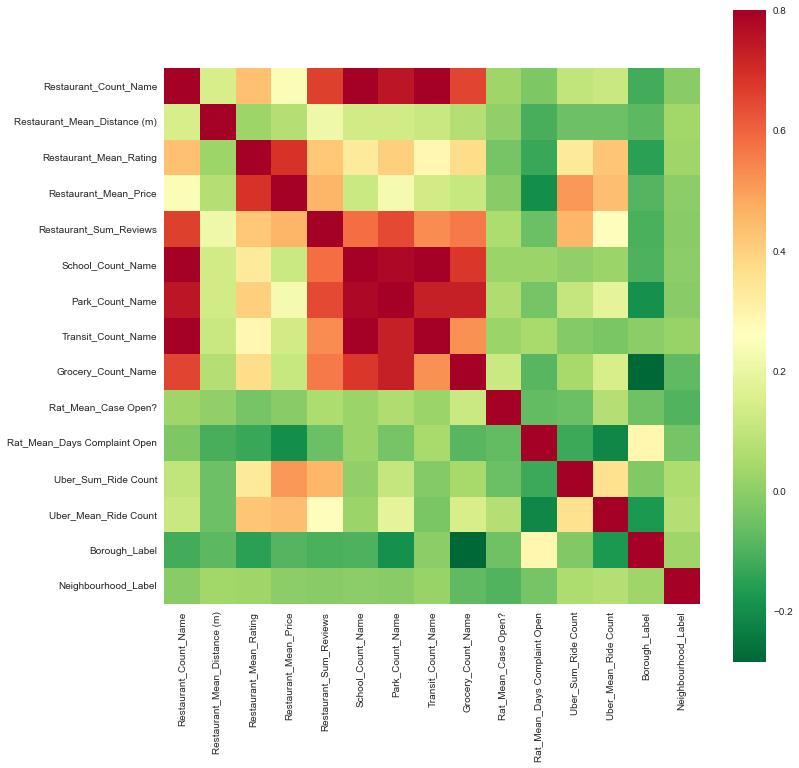

In [87]:
cormat = nyc_scaled.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cormat, vmax=.8, square=True, cmap="RdYlGn_r");

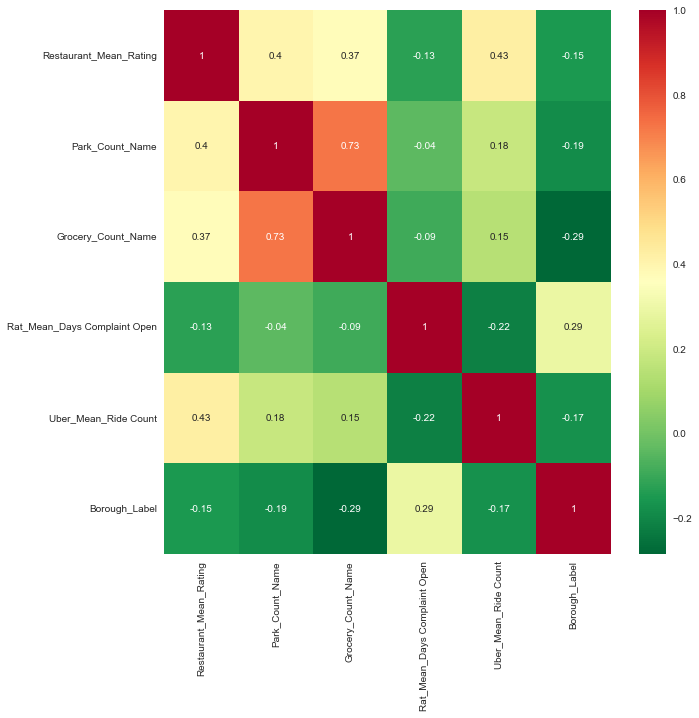

In [88]:
# Most correlated features with Borough
corrmat = nyc_scaled.corr()
top_corr_features = corrmat.index[abs(corrmat['Borough_Label'])>0.15]
plt.figure(figsize=(10,10))
g = sns.heatmap(nyc[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

Provides a visual aspect, but does directly input which features account for the most variance.

### Principal Component Analysis (PCA)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [90.0%] explained variance using the [15] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [9] that covers the [90.00%] explained variance.
[pca] >The PCA reduction is performed on the [15] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


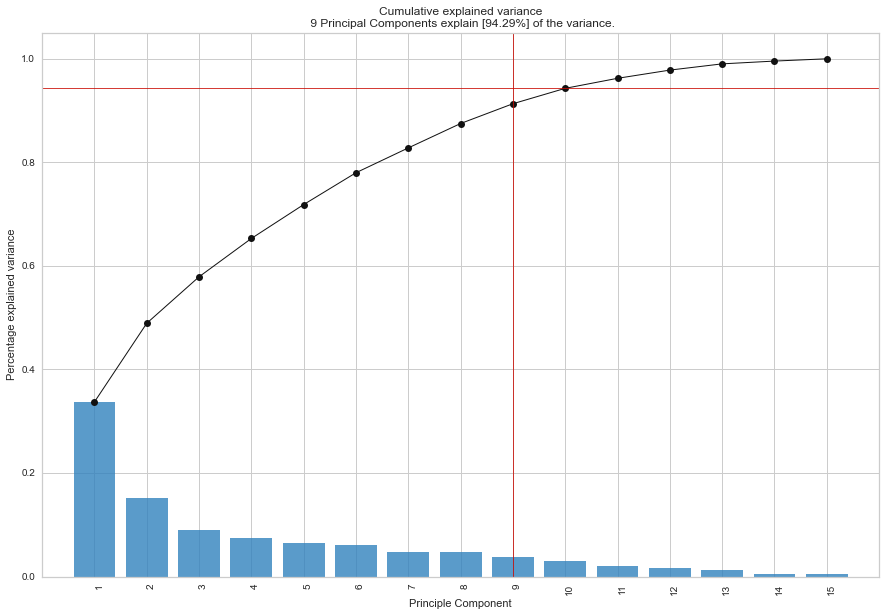

,PC,feature,loading,type
0,PC1,Restaurant_Count_Name,0.403918,best
1,PC2,Restaurant_Mean_Price,0.466956,best
2,PC3,Borough_Label,0.604641,best
3,PC4,Neighbourhood_Label,0.627065,best
4,PC5,Restaurant_Mean_Distance (m),0.726257,best
5,PC6,Rat_Mean_Case Open?,0.717517,best
6,PC7,Uber_Sum_Ride Count,0.623831,best
7,PC8,Rat_Mean_Days Complaint Open,0.731171,best
8,PC9,Uber_Mean_Ride Count,0.739799,best
9,PC7,Restaurant_Mean_Rating,-0.528558,weak


<Figure size 432x288 with 0 Axes>

In [89]:
from pca import pca

# Initialize with normalization
model = pca(normalize=True, n_components=.90) #n_components -> Set to None if you wanna keep all

# Fit scaled DataFrame
results = model.fit_transform(nyc_scaled) 
# results = model.fit_transform(X, col_labels=labels, row_labels=y) # Array

# Scree plot with explained variance
model.plot()

# Top performing features
model.results['topfeat']

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [306] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [306] unique colors! Available unique colors: [9].


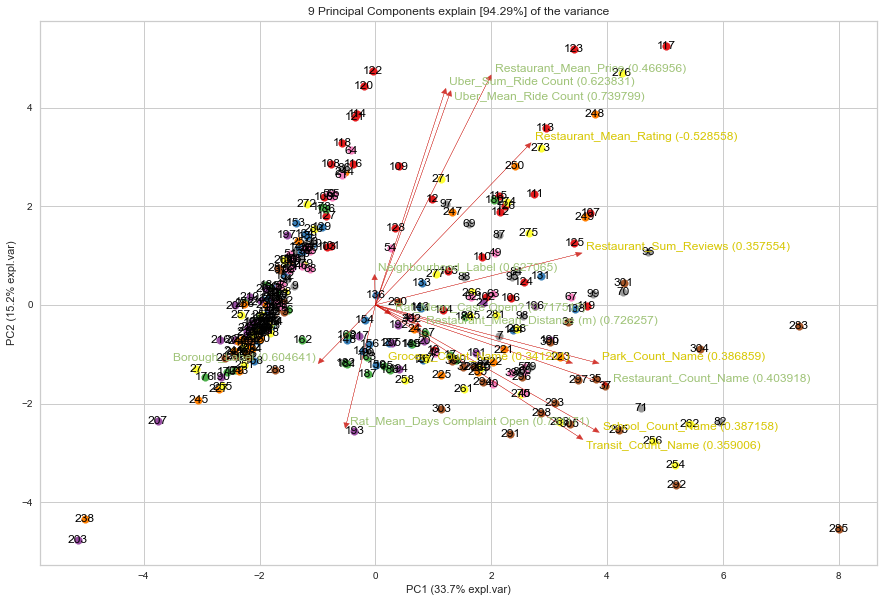

In [90]:
# Model PCA using 2D biplot
model.biplot(y=None, legend=False);

In [91]:
# Create a DataFrame of the top PCA components
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [92]:
# Create new DataFrame with top PCA components
pca_scaled = apply_pca(nyc_scaled, 9)
pca_scaled.head()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,-0.337081,0.114313,-0.582406,-0.535801,0.082274,0.018808,0.000842,0.005903,0.036397
1,-0.380300,0.203112,-0.652771,0.195967,0.085498,0.091957,0.002052,0.076432,0.036505
2,-0.371600,0.191911,-0.643324,0.119493,0.090808,0.077409,-0.008988,0.041615,-0.018773
3,-0.362523,0.198101,-0.631810,0.080407,0.123447,0.070609,0.001022,0.020180,0.075537
4,-0.337678,0.137050,-0.584371,-0.369399,0.118957,0.026225,-0.006978,-0.027387,0.002959


## Modeling

#### Preparation

In [93]:
# Set up the clustering models

# Cluster for all features, based on top principal components
X = pca_scaled

# K-Means
km = KMeans(n_clusters=3, init='k-means++')
y_km = km.fit_predict(X) 
km.labels_

# Hierarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3)
y_ac = ac.fit_predict(X)

# DBSCAN
dpebs = 0.8
dbsample = 3
db = DBSCAN(eps=dpebs, min_samples=dbsample, metric='euclidean')
y_db = db.fit_predict(X)

In [94]:
# Create function to plot clusters
def plot_clusters(X,y_res, x_label="X-axis", y_label="Y-axis", plt_cluster_centers=True):
    
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')

    plt.rcParams["figure.figsize"]=(15,15) 
    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.show()

In [95]:
def scatter(X, y_res, plt_cluster_centers=False):

    X_centroids = []
    Y_centroids = []
    
    plt.rcParams["figure.figsize"]=(15,8) 

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    c='black',
                    s=50,
                    marker='s',
                    )
    plt.grid()
    plt.show()

#### Unclustered Plot

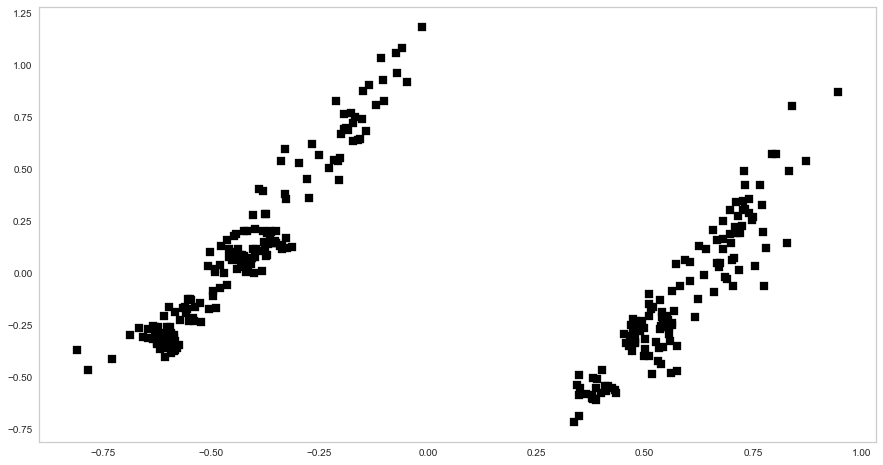

In [96]:
# Create scatter plot without clusters
scatter(np.array(pca_scaled), y_km);

#### K-Means Clustering

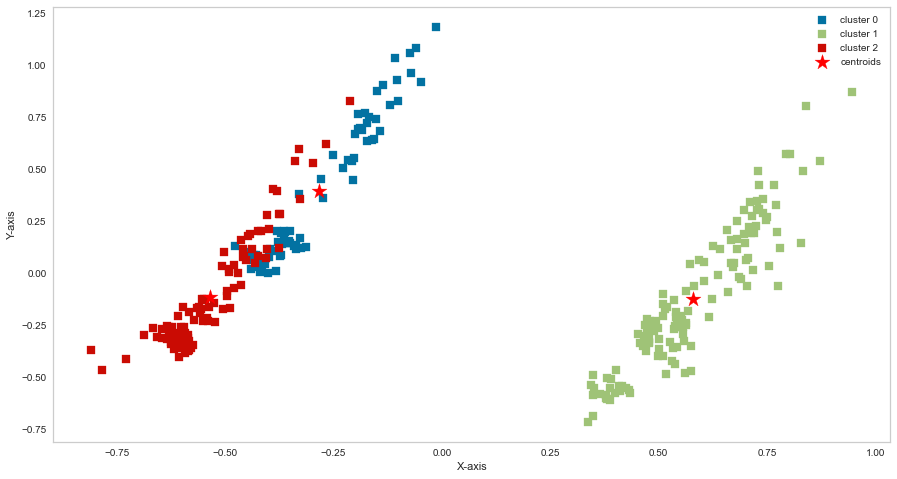

In [97]:
# K-Means Cluster
plot_clusters(np.array(pca_scaled), y_km)

In [98]:
# Map each cluster to the corresponding neighbourhood
cluster_id = km.labels_
cluster_id = cluster_id.tolist()
neighb = nyc.dropna(inplace=True)
neighb = nyc['Neighbourhood']
len(neighb)

sub = pd.DataFrame(
    {'Neighbourhood':neighb,
    'Cluster_ID':cluster_id}).reset_index(drop=True)

sub.head(50)

# Export to csv for submission
sub.to_csv('submission.csv')

#### K-Means (Neighbourhoods, k=2)

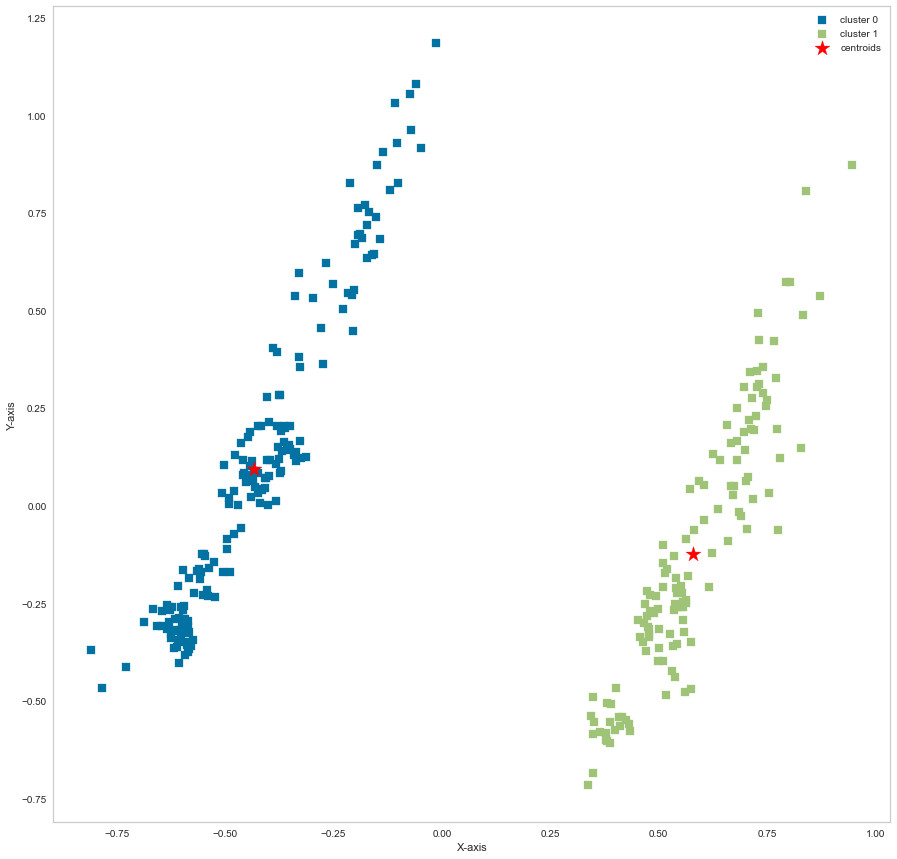

In [99]:
# K-Means
km = KMeans(n_clusters=2, init='k-means++')
y_km = km.fit_predict(X)

plot_clusters(np.array(pca_scaled), y_km)

#### Hierarchical Cluster

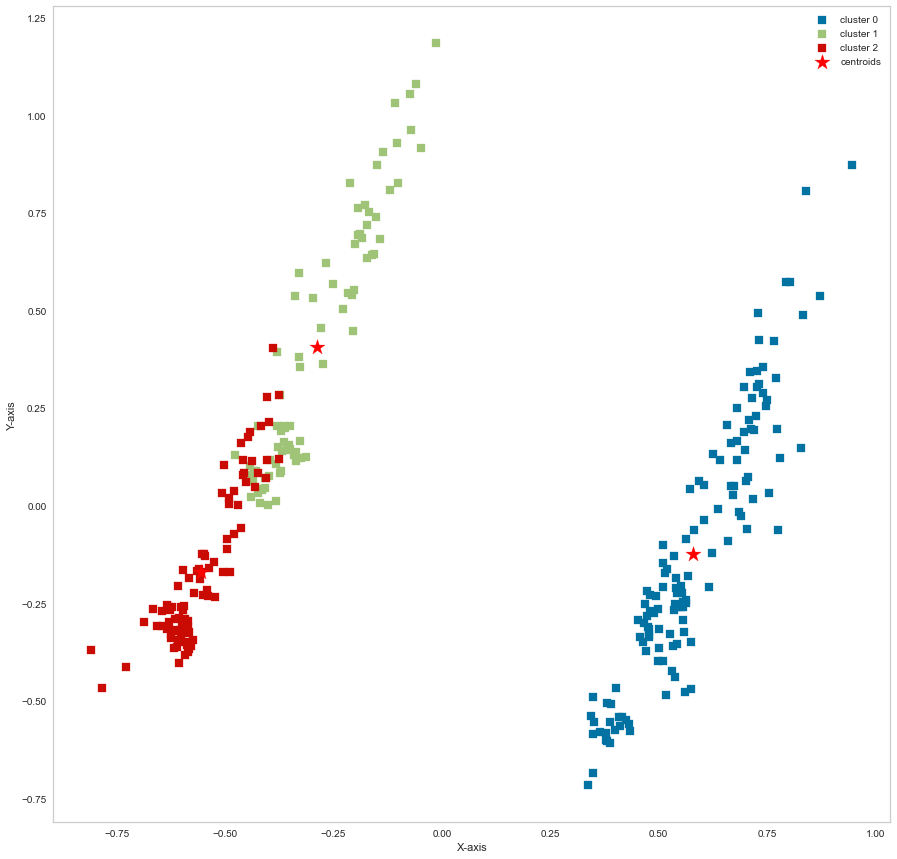

In [100]:
# Hierarchical Cluster
plot_clusters(np.array(X), y_ac)

#### DBSCAN Cluster

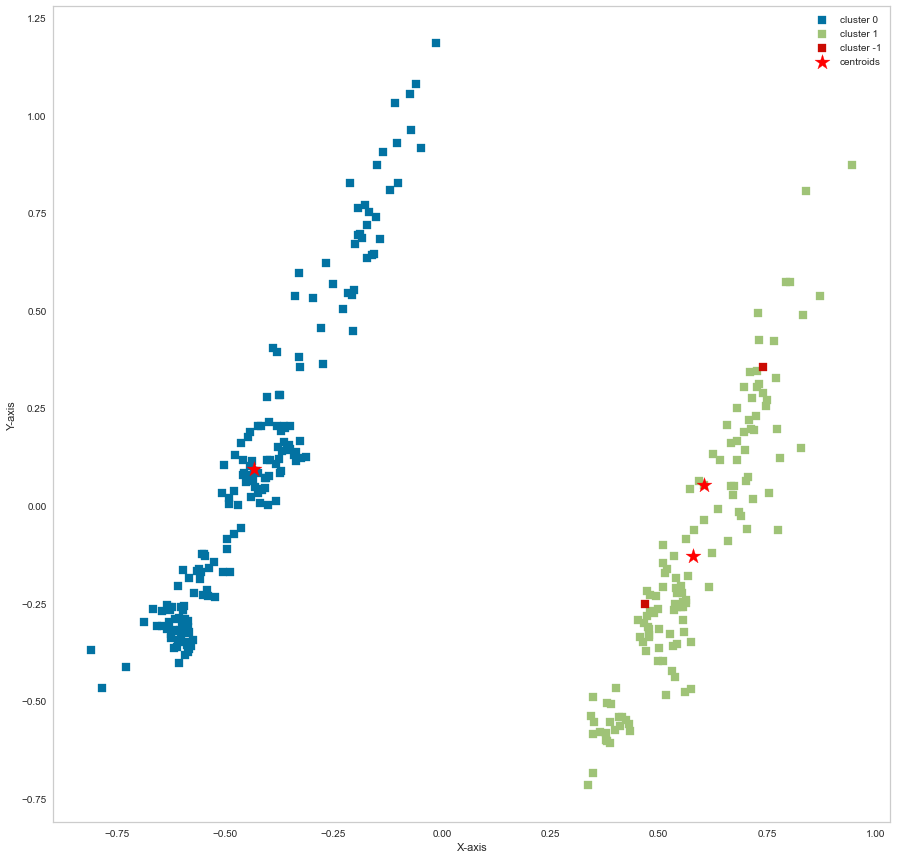

In [101]:
# DBSCAN Cluster
plot_clusters(np.array(X), y_db)

## Model Evaluation

* To evaluate our k-means models, we can use inertia, aka an elbow plot to help choose the optimal number of clusters

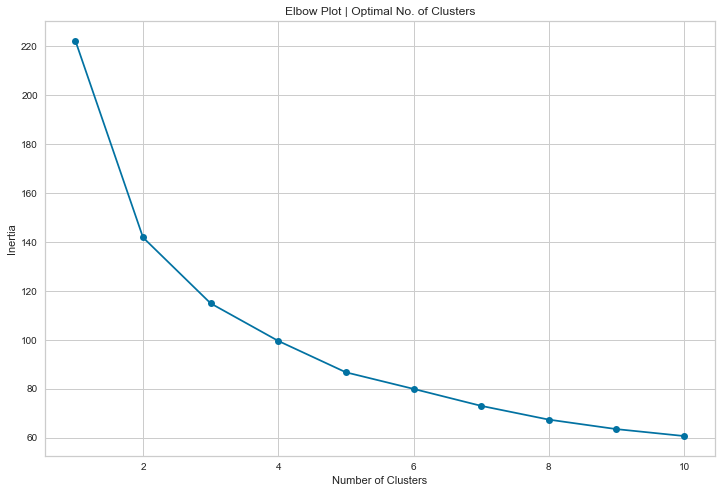

In [102]:
# Create elbow plot
X = nyc_scaled

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.rcParams["figure.figsize"] = (12,8) 
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Plot | Optimal No. of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

K = 3

* To evaluate our hierarchical model, we can use a dendrogram to help choose the optimal number of clusters

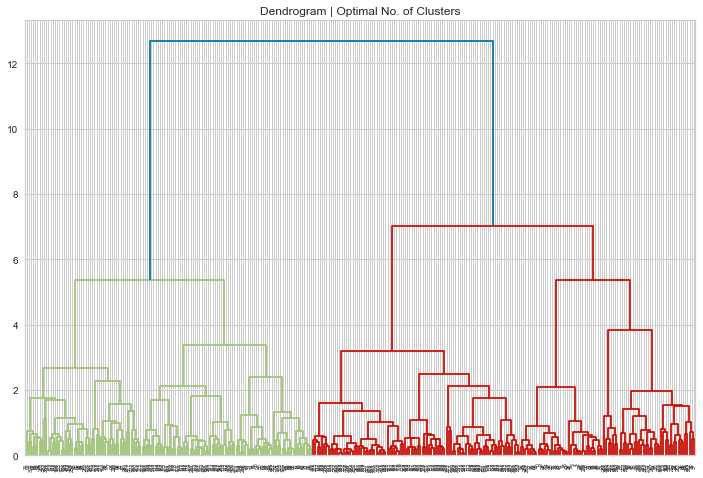

In [103]:
# Create a dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram | Optimal No. of Clusters")
plt.show()

Clusters = 3

* To further evaluate our k-means models, we can visualize the optimal amount of clusters with a [silhoutte plot and score](https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam)

In [104]:
from sklearn import metrics
# Calculate silhoutte score of k-means clustering
score = metrics.silhouette_score(X, km.labels_, metric='euclidean')

# Print score to 3 decimal places
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.256


The value of the silhouette score varies from -1 to 1. 
* \>0 to 1 indicates that the clusters are dense and well-separated
* 0 represents overlapping clusters with samples very close to the decision boundary of neighboring clusters.
* -1 to 0 indicates that samples may have been assigned to the wrong clusters

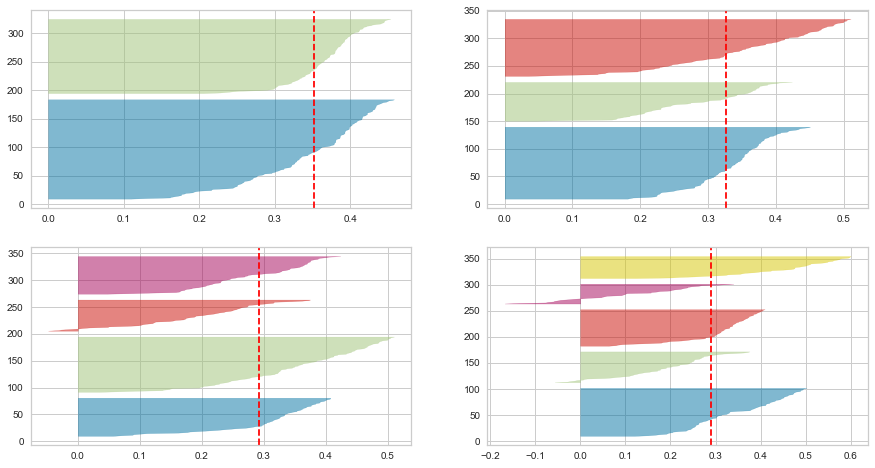

In [105]:
from yellowbrick.cluster import SilhouetteVisualizer

# Create silhoutte plots to visualize the effectiveness of varying number of clusters (2, 3, 4, and 5)
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100)
    q, mod = divmod(i, 2)
  
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Based on the analysis of the silhouette plots:
* 5 clusters is suboptimal as one cluster barely makes it over the average silhoutte score, as well all the widths of each silhoutte being thin and disproportionate
* 4 clusters look to be a slight improvement over 5, with cluster widths starting to widen, and all clusters being over the average silhoutte score
* 2 and 3 clusters look optimal, with 3 being the most optimal, as all clusters are over the average score, and have a more uniform thickness and cluster distribution